In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [144]:
X1 = np.linspace(-5,5,500)
print(1)

1


In [145]:
X2 = np.linspace(5,9,500)
print(X2)

[5.         5.00801603 5.01603206 5.0240481  5.03206413 5.04008016
 5.04809619 5.05611222 5.06412826 5.07214429 5.08016032 5.08817635
 5.09619238 5.10420842 5.11222445 5.12024048 5.12825651 5.13627255
 5.14428858 5.15230461 5.16032064 5.16833667 5.17635271 5.18436874
 5.19238477 5.2004008  5.20841683 5.21643287 5.2244489  5.23246493
 5.24048096 5.24849699 5.25651303 5.26452906 5.27254509 5.28056112
 5.28857715 5.29659319 5.30460922 5.31262525 5.32064128 5.32865731
 5.33667335 5.34468938 5.35270541 5.36072144 5.36873747 5.37675351
 5.38476954 5.39278557 5.4008016  5.40881764 5.41683367 5.4248497
 5.43286573 5.44088176 5.4488978  5.45691383 5.46492986 5.47294589
 5.48096192 5.48897796 5.49699399 5.50501002 5.51302605 5.52104208
 5.52905812 5.53707415 5.54509018 5.55310621 5.56112224 5.56913828
 5.57715431 5.58517034 5.59318637 5.6012024  5.60921844 5.61723447
 5.6252505  5.63326653 5.64128257 5.6492986  5.65731463 5.66533066
 5.67334669 5.68136273 5.68937876 5.69739479 5.70541082 5.71342

In [146]:
y = 0.0003 * X1**2 - + 0.00002 * X2**3
print(y)

[ 5.00000000e-03  4.92795691e-03  4.85611616e-03  4.78447770e-03
  4.71304146e-03  4.64180738e-03  4.57077540e-03  4.49994546e-03
  4.42931750e-03  4.35889145e-03  4.28866725e-03  4.21864485e-03
  4.14882417e-03  4.07920516e-03  4.00978776e-03  3.94057190e-03
  3.87155752e-03  3.80274456e-03  3.73413296e-03  3.66572265e-03
  3.59751358e-03  3.52950568e-03  3.46169889e-03  3.39409316e-03
  3.32668841e-03  3.25948458e-03  3.19248162e-03  3.12567946e-03
  3.05907804e-03  2.99267729e-03  2.92647717e-03  2.86047760e-03
  2.79467852e-03  2.72907987e-03  2.66368159e-03  2.59848362e-03
  2.53348589e-03  2.46868835e-03  2.40409093e-03  2.33969357e-03
  2.27549621e-03  2.21149878e-03  2.14770123e-03  2.08410349e-03
  2.02070551e-03  1.95750721e-03  1.89450854e-03  1.83170943e-03
  1.76910983e-03  1.70670967e-03  1.64450889e-03  1.58250743e-03
  1.52070523e-03  1.45910222e-03  1.39769834e-03  1.33649353e-03
  1.27548774e-03  1.21468089e-03  1.15407292e-03  1.09366378e-03
  1.03345341e-03  9.73441

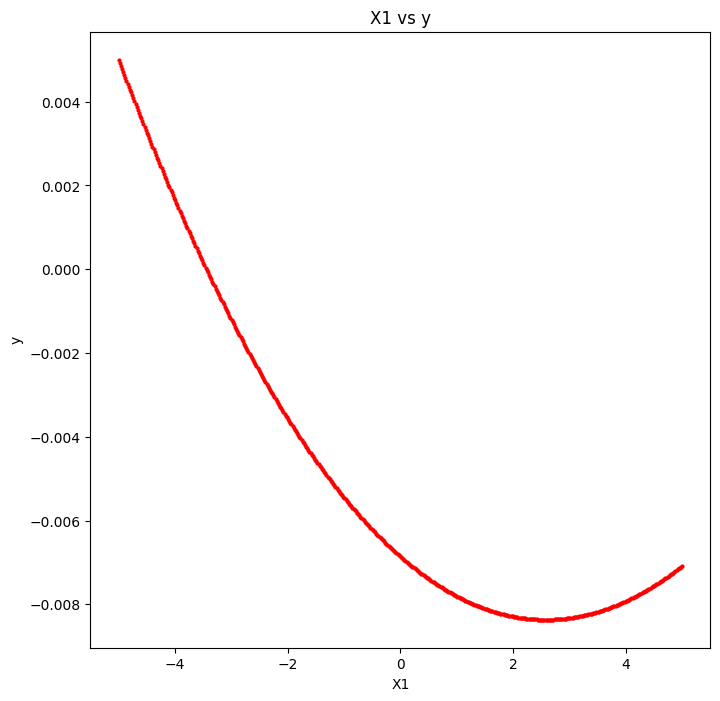

In [147]:
plt.figure(figsize=(8,8))
plt.title('X1 vs y')
plt.xlabel('X1')
plt.ylabel('y')
plt.scatter(X1,y,s=4,c='r')
plt.show()

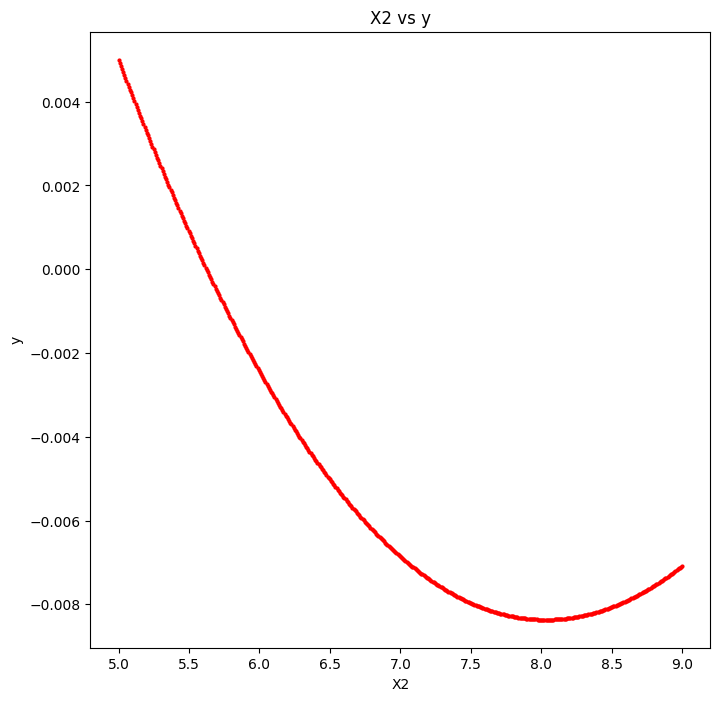

In [148]:
plt.figure(figsize=(8,8))
plt.title('X2 vs y')
plt.xlabel('X2')
plt.ylabel('y')
plt.scatter(X2,y,s=4,c='r')
plt.show()

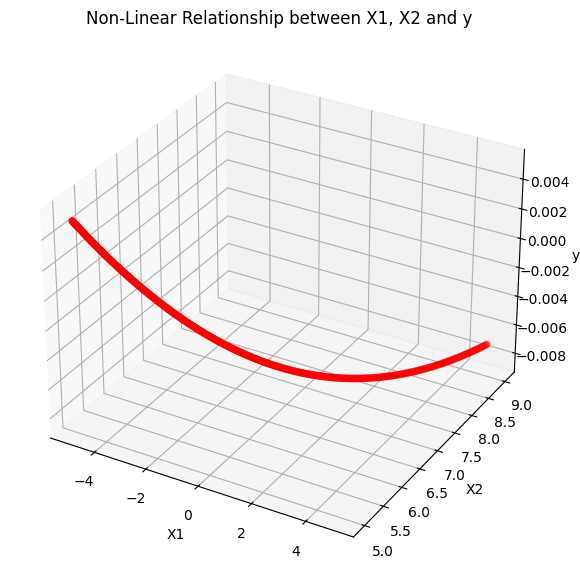

In [149]:
# Visualize the generated data
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(projection='3d')
ax.scatter(X1, X2, y, c='r')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('y')
ax.set_title('Non-Linear Relationship between X1, X2 and y')
plt.show()

# Implementing SVR from scratch

## Define the RBF kernel

In [150]:
def rbf_kernel(x, x_prime, sigma):
    # Compute the squared Euclidean distance
    distance = np.sum((x - x_prime) ** 2)
    # Compute the RBF kernel
    return np.exp(-distance / (2 * sigma ** 2))

## Define the episilon insensitive loss

# Epsilon-Insensitive Loss

Epsilon-insensitive loss is commonly used in Support Vector Machines (SVMs) for regression, also known as **Support Vector Regression (SVR)**. It is a loss function that allows for some margin of error when approximating a function. This means that small deviations between the predicted and actual values, within a predefined margin (epsilon), do not contribute to the loss.

## Formula

The epsilon-insensitive loss function is defined as:

\[
L_{\epsilon}(y, f(x)) = 
\begin{cases} 
0 & \text{if } |y - f(x)| \leq \epsilon \\
|y - f(x)| - \epsilon & \text{if } |y - f(x)| > \epsilon
\end{cases}
\]

Where:
- \( y \) is the actual value.
- \( f(x) \) is the predicted value (the output of the model).
- \( \epsilon \) is the margin of tolerance.

## Key Features

- **Tolerance Margin**: Epsilon defines a margin of tolerance where errors are not penalized. The model is allowed to make errors as long as they are within the epsilon range.
- **Sparsity**: The loss is sparse because it only contributes to the error when the difference between the actual and predicted values exceeds epsilon.
- **Robustness**: This loss function helps to make the model more robust to small variations in the data.

## Visual Representation

In a graphical sense, the epsilon-insensitive loss can be seen as follows:

- If the predicted value \( f(x) \) is within the range \( y \pm \epsilon \), the loss is zero.
- If the predicted value \( f(x) \) falls outside this range, the loss increases linearly with the deviation from the epsilon margin.

##


In [151]:
def epsilon_insensitive_loss(y_true,y_pred,epsilon=0.1):
    return np.maximum(0,np.abs(y_true-y_pred)-epsilon)

In [152]:
!pip install cvxopt

Defaulting to user installation because normal site-packages is not writeable


# Support Vector Regression (SVR) Objective Function

The goal of **Support Vector Regression (SVR)** is to minimize the following objective function:

\[
\min_{\alpha} \frac{1}{2} \alpha^T K \alpha - \epsilon \sum_{i} \alpha_i
\]

Where:

- \( \alpha \) is the vector of **Lagrange multipliers**.
- \( K \) is the **kernel matrix**.
- \( \epsilon \) is the **error tolerance**.

## Explanation:

- **Kernel Matrix (K)**: The kernel function is used to map the input data into a higher-dimensional feature space. The matrix \( K \) represents the pairwise evaluations of the kernel function between data points.
- **Lagrange Multipliers (α)**: These are variables that help in optimizing the objective function. The values of \( \alpha \) are learned during the optimization process.
- **Error Tolerance (ϵ)**: This parameter defines the margin of error within which no penalty is given. If the difference between the predicted and actual values is within this margin, no penalty is added.

The objective function tries to find the optimal \( \alpha \) values that minimize the loss while maintaining an error tolerance \( \epsilon \) for small deviations from the true values.

## Summary:

- The quadratic term \( \frac{1}{2} \alpha^T K \alpha \) controls the complexity of the model.
- The linear term \( - \epsilon \sum_{i} \alpha_i \) penalizes the deviations greater than \( \epsilon \).

This formulation ensures a balance between fitting the data accurately and preventing overfitting.


In [153]:
import cvxopt
class SVR(object):
    def __init__(self, C = 1.0, epsilon = 0.1, sigma = 0.1):
        self.epsilon = epsilon
        self.C = C
        self.sigma = sigma
        self.alpha = None
        self.support_vectors = None
        self.kernel_matrix = None
        self.X_train = None
        self.y_train = None

    def fit(self, X, y):
        n_samples,n_features = X.shape
        self.X_train = X
        self.y_train = y
        self.kernel_matrix = np.zeros((n_samples,n_samples))
        for i in range(n_samples):
            for j in range(n_samples):
                self.kernel_matrix[i,j] = rbf_kernel(X[i],X[j],sigma = self.sigma)
 
        # Define the QP problem
        # Minimize: (1/2) * alpha^T * K * alpha - epsilon * sum(alpha)

        #cvxopt: solves quadratic optimization (QP) problems
        P = cvxopt.matrix(self.kernel_matrix) # (1/2) * alpha^T * K * alpha
        q = cvxopt.matrix(-y) # -epsilon * sum(alpha)

        # Constraints: 0 <= alpha_i <= C for each i
        G = cvxopt.matrix(np.vstack((-np.eye(n_samples), np.eye(n_samples)))) # np.eye creates a 2D identity matrix
        h = cvxopt.matrix(np.hstack((np.zeros(n_samples), np.ones(n_samples) * self.C))) 

        # Solve QP problem
        solution = cvxopt.solvers.qp(P, q, G, h)
        self.alpha = np.array(solution['x']).flatten()
        
        self.support_vectors = np.where(self.alpha > 1e-5)[0] 
        # If the data point is on the margin or misclassified: alpha_i != 0
        # else alpha_i = 0
        return self

    def predict(self, X):
        y_pred = np.zeros(X.shape[0])
        
        for i in range(X.shape[0]):
            sum_kernel = 0
            
            # Make sure we access support vectors within bounds
            for sv_index in self.support_vectors:
                if sv_index < X.shape[0]:  # Ensure the index is within training data bounds
                    sum_kernel += self.alpha[sv_index] * rbf_kernel(X[i], X[sv_index], sigma=self.sigma)
            
            y_pred[i] = sum_kernel
            
        return y_pred     

In [154]:
X1 = X1.reshape(-1,1)
X2 = X2.reshape(-1,1)
print(X1.shape)
print(X2.shape)
X = np.concatenate((X1,X2),axis = 1)
print(X.shape)

(500, 1)
(500, 1)
(500, 2)


In [155]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)
print(X.shape)
print(X_test.shape)

(500, 2)
(100, 2)


In [156]:
#Train the SVR model
svr_model = SVR(C=1.0, epsilon=0.1, sigma=1.0)
svr_model.fit(X_train, y_train)

# Predict on the test set
y_pred = svr_model.predict(X_test)

     pcost       dcost       gap    pres   dres
 0:  2.3238e+00 -4.0638e+02  4e+02  3e-17  6e-15
 1:  6.7506e-01 -8.7663e+00  9e+00  2e-16  1e-14
 2:  1.0481e-01 -2.1864e-01  3e-01  2e-16  4e-15
 3:  1.5594e-02 -1.5237e-02  3e-02  2e-16  2e-15
 4:  2.3856e-03 -2.0616e-03  4e-03  2e-16  6e-16
 5:  3.7101e-04 -2.4938e-04  6e-04  2e-16  2e-16
 6:  4.3196e-05 -3.1779e-05  7e-05  2e-16  1e-16
 7:  2.8620e-06 -1.4813e-05  2e-05  2e-16  5e-17
 8: -5.7481e-06 -1.5806e-05  1e-05  2e-16  4e-17
 9: -1.1851e-05 -1.2246e-05  4e-07  2e-16  5e-17
10: -1.2139e-05 -1.2143e-05  4e-09  2e-16  5e-17
Optimal solution found.


In [157]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,y_pred)
print(f"mean squared error is {mse}")

mean squared error is 3.926274961597056e-05
